# AUS_Immigration_Impact

This is a project that aims to collect data from trusted sources and perform analysis in order to see if Immigrants affect the australian economy. 

Due to the recent pandemic, we understand that the government is predicting a drop of 85% of citzenchips applications. Therefore, this is a very serious analysis for the future of Australian economy.

We collected data from 2010 to 2019, since we still do not have the totality of 2020 data yet.

In [3]:
import tabula
import pandas as pd
import numpy as np

# Web scraping Australia Immigration History

First we used tabula to scrape a table from a pdf web page

In [12]:
file = "https://www.homeaffairs.gov.au/research-and-stats/files/report-migration-program-2018-19.pdf"

In [13]:
tables = tabula.read_pdf(file, pages = "all", multiple_tables = True)

Got stderr: Aug. 24, 2020 9:02:00 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Aug. 24, 2020 9:02:00 AM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font Arial-BoldMT are not implemented in PDFBox and will be ignored
Aug. 24, 2020 9:02:00 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Aug. 24, 2020 9:02:01 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Aug. 24, 2020 9:02:01 AM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font Arial-BoldMT are not implemented in PDFBox and will be ignored
Aug. 24, 2020 9:02:01 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Aug. 24, 2020 9:02:02 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Aug. 24, 2020 9:02:02 AM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font Arial-BoldMT are not implemented in PDFBox and will be ignored
Aug. 24, 2020 9:02:02 AM org.apache.pdfbox.pdmode

In [22]:
tableunclean1 = tables[0]

In [31]:
tableunclean2 = tableunclean1.iloc[3:]
tableunclean2.head()


,Outcome,Unnamed: 0,Stream,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
3,2009-10,"107,868","60,254 501",NaN,"168,623",64.0%,35.7%
4,2010-11,"113,725","54,543 417",NaN,"168,685",67.4%,32.3%
5,2011-12,"125,755","58,604 639",NaN,"184,998",68.0%,31.7%
6,2012-13,"128,973","60,185 842",NaN,"190,000",67.9%,31.7%
7,2013-14,"128,550","61,112 338",NaN,"190,000",67.7%,32.2%


In [26]:
tableunclean2.columns

Index(['Outcome', 'Unnamed: 0', 'Stream', 'Unnamed: 1', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')

In [30]:
df2_tidy = tableunclean2.rename(columns = {'Outcome': 'Year', 'Unnamed: 0': 'Skill', 'Stream': 'Family', 'Unnamed: 1': 'Child', 'Unnamed: 2': 'Total', 'Unnamed: 3': '% Skill', 'Unnamed: 4': '% Family'}, inplace = False)
df2_tidy.head()

,Year,Skill,Family,Child,Total,% Skill,% Family
3,2009-10,"107,868","60,254 501",NaN,"168,623",64.0%,35.7%
4,2010-11,"113,725","54,543 417",NaN,"168,685",67.4%,32.3%
5,2011-12,"125,755","58,604 639",NaN,"184,998",68.0%,31.7%
6,2012-13,"128,973","60,185 842",NaN,"190,000",67.9%,31.7%
7,2013-14,"128,550","61,112 338",NaN,"190,000",67.7%,32.2%


In [42]:
df2_tidy['Special Eligibility'] = df2_tidy['Family'].str[-3:]
df2_tidy['Family'] = df2_tidy['Family'].str[:6]
df2_tidy.replace(np.nan, 0, inplace=True) 
df2_tidy

,Year,Skill,Family,Child,Total,% Skill,% Family,Special Eligibility
3,2009-10,"107,868","60,254",0,"168,623",64.0%,35.7%,254
4,2010-11,"113,725","54,543",0,"168,685",67.4%,32.3%,543
5,2011-12,"125,755","58,604",0,"184,998",68.0%,31.7%,604
6,2012-13,"128,973","60,185",0,"190,000",67.9%,31.7%,185
7,2013-14,"128,550","61,112",0,"190,000",67.7%,32.2%,112
8,2014-15,"127,774","61,085",0,"189,097",67.6%,32.3%,085
9,2015-16,"128,550","57,400","3,512","189,770",69.0%,30.8%,400
10,2016-17,"123,567","56,220","3,400","183,608",68.6%,31.2%,220
11,2017-18,"111,099","47,732","3,350","162,417",69.8%,30.0%,732
12,2018-19,"109,713","47,247","3,248","160,323",69.8%,30.1%,247


In [43]:
df_IMMI = df2_tidy[['Year', 'Skill', 'Family', 'Special Eligibility', 'Child', 'Total', '% Skill', '% Family',]]
df_IMMI

,Year,Skill,Family,Special Eligibility,Child,Total,% Skill,% Family
3,2009-10,"107,868","60,254",254,0,"168,623",64.0%,35.7%
4,2010-11,"113,725","54,543",543,0,"168,685",67.4%,32.3%
5,2011-12,"125,755","58,604",604,0,"184,998",68.0%,31.7%
6,2012-13,"128,973","60,185",185,0,"190,000",67.9%,31.7%
7,2013-14,"128,550","61,112",112,0,"190,000",67.7%,32.2%
8,2014-15,"127,774","61,085",085,0,"189,097",67.6%,32.3%
9,2015-16,"128,550","57,400",400,"3,512","189,770",69.0%,30.8%
10,2016-17,"123,567","56,220",220,"3,400","183,608",68.6%,31.2%
11,2017-18,"111,099","47,732",732,"3,350","162,417",69.8%,30.0%
12,2018-19,"109,713","47,247",247,"3,248","160,323",69.8%,30.1%


In [52]:
df_IMMI = df_IMMI.replace(',','', regex=True)
df_IMMI = df_IMMI.replace('%','', regex=True)
df_IMMI[['Skill', 'Family', 'Special Eligibility', 'Child', 'Total', '% Skill', '% Family']] = df_IMMI[['Skill', 'Family', 'Special Eligibility', 'Child', 'Total', '% Skill', '% Family']].apply(pd.to_numeric)
df_IMMI

,Year,Skill,Family,Special Eligibility,Child,Total,% Skill,% Family
3,2009-10,107868,60254,254,0,168623,64.0,35.7
4,2010-11,113725,54543,543,0,168685,67.4,32.3
5,2011-12,125755,58604,604,0,184998,68.0,31.7
6,2012-13,128973,60185,185,0,190000,67.9,31.7
7,2013-14,128550,61112,112,0,190000,67.7,32.2
8,2014-15,127774,61085,85,0,189097,67.6,32.3
9,2015-16,128550,57400,400,3512,189770,69.0,30.8
10,2016-17,123567,56220,220,3400,183608,68.6,31.2
11,2017-18,111099,47732,732,3350,162417,69.8,30.0
12,2018-19,109713,47247,247,3248,160323,69.8,30.1


In [108]:

df_IMMI["Year"].replace({"2009-10": "2010", "2010-11": "2011", "20012": "2012", "2012-13": "2013", "2013-14": "2014", "2014-15": "2015", "2015-16": "2016", "2016-17": "2017", "2017-18": "2018", "2018-19": "2019"}, inplace=True)
df_IMMI

,Year,Skill,Family,Special Eligibility,Child,Total,% Skill,% Family
3,2010,107868,60254,254,0,168623,64.0,35.7
4,2011,113725,54543,543,0,168685,67.4,32.3
5,2012,125755,58604,604,0,184998,68.0,31.7
6,2013,128973,60185,185,0,190000,67.9,31.7
7,2014,128550,61112,112,0,190000,67.7,32.2
8,2015,127774,61085,85,0,189097,67.6,32.3
9,2016,128550,57400,400,3512,189770,69.0,30.8
10,2017,123567,56220,220,3400,183608,68.6,31.2
11,2018,111099,47732,732,3350,162417,69.8,30.0
12,2019,109713,47247,247,3248,160323,69.8,30.1


In [109]:
df_IMMI.to_csv('df_IMMI.csv', index = False)

In [203]:
immi_df = pd.read_csv("df_IMMI.csv")
all_dfs = immi_df
immi_df.head()

,Year,Skill,Family,Special Eligibility,Child,Total,% Skill,% Family
0,2010,107868,60254,254,0,168623,64.0,35.7
1,2011,113725,54543,543,0,168685,67.4,32.3
2,2012,125755,58604,604,0,184998,68.0,31.7
3,2013,128973,60185,185,0,190000,67.9,31.7
4,2014,128550,61112,112,0,190000,67.7,32.2


# Web scraping volume of international studants in australia by year and sector

In [126]:
# Data of Students in Australia 

#url = https://www.austrade.gov.au/Australian/Education/Education-data/Current-data/pivot-tables
df_studentsRaw = pd.read_csv("/home/michel/Documents/StudentsEnrrold.csv")
df_studentsRaw

,Sector,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Higher Education,"60,053","62,317","60,311","54,253","55,420","63,851","66,395","73,762","83,618","90,887","100,475","87,004"
1,VET,"62,087","55,915","51,809","45,512","41,788","49,928","54,845","60,550","68,102","73,403","83,177","90,870"
2,Schools,"8,164","6,998","5,667","4,956","5,120","5,370","6,299","7,386","8,150","8,451","7,815","7,398"
3,ELICOS,"56,376","44,530","36,957","35,619","40,689","51,594","53,264","54,963","57,640","56,436","56,984","43,292"
4,Grand Total,"200,371","183,491","167,044","151,496","154,857","185,655","196,469","214,897","237,344","248,918","267,031","244,891"


In [127]:
df_s1 = df_studentsRaw.transpose()
df_s1.head()

,0,1,2,3,4
Sector,Higher Education,VET,Schools,ELICOS,Grand Total
2009,"60,053","62,087","8,164","56,376","200,371"
2010,"62,317","55,915","6,998","44,530","183,491"
2011,"60,311","51,809","5,667","36,957","167,044"
2012,"54,253","45,512","4,956","35,619","151,496"


In [ ]:
df_s1.to_csv('df_s1.csv', index = False)

In [124]:
#dfs2 = pd.read_csv("df_s1.csv")
#dfs2.columns

In [125]:
#dfs2.head()

In [123]:
#dfs3 = dfs2.rename(columns = {'0': 'Higher Education', '1': 'VET', '2': 'Schools', '3': 'ELICOS', '4': 'Total'}, inplace = False)
#dfs3 = dfs3.iloc[1:]
#dfs3.columns

In [217]:
#dfs4 = dfs3.replace(',','', regex=True)
dfs4[['Higher Education', 'VET', 'Schools', 'ELICOS', 'Total Students']] = dfs4[['Higher Education', 'VET', 'Schools', 'ELICOS', 'Total Students']].apply(pd.to_numeric)
#dfs4.head()

In [218]:
dfs5 = dfs4.iloc[1:]
dfs5.to_csv('df_s1.csv', index = False)

In [225]:
# data from 2010 to 2020
dfStudents = pd.read_csv("df_s1.csv")
dfStudents

,Higher Education,VET,Schools,ELICOS,Total,Total Students
0,62317,55915,6998,44530,183491,183491
1,60311,51809,5667,36957,167044,167044
2,54253,45512,4956,35619,151496,151496
3,55420,41788,5120,40689,154857,154857
4,63851,49928,5370,51594,185655,185655
5,66395,54845,6299,53264,196469,196469
6,73762,60550,7386,54963,214897,214897
7,83618,68102,8150,57640,237344,237344
8,90887,73403,8451,56436,248918,248918
9,100475,83177,7815,56984,267031,267031


# Web scrapping Australian historical GDP

For this scrapping I used requests, BeautifulSoup and Pandas to extract the table from the URL

In [4]:
import requests
from bs4 import BeautifulSoup

In [132]:
base_site = "https://www.macrotrends.net/countries/AUS/australia/gdp-growth-rate"

In [133]:
r = requests.get(base_site)

In [137]:
html = r.content

In [138]:
tables = pd.read_html(base_site)

In [139]:
type(tables[0])

pandas.core.frame.DataFrame

In [140]:
len(tables)

4

In [156]:
au_gdp_df = tables[1].head(10)

In [166]:
au_gdp_df.columns = [['Year', '% GDP Growth', '% Annual Change']]    

In [178]:
AU1 = au_gdp_df.replace('%','', regex=True)
AU1.to_csv('AUGDP.csv', index = False)

In [182]:
AU2 = pd.read_csv("AUGDP.csv")

pandas.core.frame.DataFrame

In [191]:
df_AU2 = AU2.sort_values(['Year'], ascending=True)
df_AU2.head()

,Year,% GDP Growth,% Annual Change
9,2010,2.07,0.13
8,2011,2.46,0.40
7,2012,3.92,1.46
6,2013,2.58,-1.33
5,2014,2.53,-0.05


In [192]:
df_AU2[['Year', '% GDP Growth', '% Annual Change']] = df_AU2[['Year', '% GDP Growth', '% Annual Change']].apply(pd.to_numeric)
df_AU2.head()

,Year,% GDP Growth,% Annual Change
9,2010,2.07,0.13
8,2011,2.46,0.40
7,2012,3.92,1.46
6,2013,2.58,-1.33
5,2014,2.53,-0.05


In [193]:
df_AU2.to_csv('AUGDP.csv', index = False)

In [220]:
AU3 = pd.read_csv("AUGDP.csv")
AU3.columns

Index(['Year', '% GDP Growth', '% Annual Change'], dtype='object')

# Data cleaning and master DF construction

In [296]:
#AU32 = AU3["% Annual Change"] #- Joing all the DF's columns into the superDF
#all_dfs = all_dfs.join(AU32)
#all_dfs

In [297]:
#all_dfs1 = all_dfs.rename(columns = {'Total': 'IMMI Total'}, inplace = False)
#all_dfs1

In [257]:
all_dfs1['Total of Students/IMMI'] = all_dfs1['IMMI Total'] + all_dfs1['Total Students']

In [298]:
#all_dfs1

In [269]:
test1 = all_dfs1

In [270]:
test1['% Total IMMI Growth '] = test1['Total of Students/IMMI'].pct_change().mul(100).round(2)
test1['% IMMI Growth '] = test1['IMMI Total'].pct_change().mul(100).round(2)
test1['% Total Students Growth '] = test1['Total Students'].pct_change().mul(100).round(2)
test1.replace(np.nan, 0, inplace=True) 

In [271]:
test1.columns

Index(['Year', 'Skill', 'Family', 'Special Eligibility', 'Child', 'IMMI Total',
       '% Skill', '% Family', 'Higher Education', 'VET', 'Schools', 'ELICOS',
       'Total Students', '% GDP Growth', '% Annual Change',
       'Total of Students/IMMI', '% of Total IMMI Growth ',
       '% Total IMMI Growth ', '% IMMI Growth ', '% Total Students Growth '],
      dtype='object')

In [272]:
FinalDF = test1[['Year', 'Skill', 'Family', 'Special Eligibility', 'Child', 'IMMI Total', '% IMMI Growth ', 
       '% Skill', '% Family', 'Higher Education', 'VET', 'Schools', 'ELICOS',
       'Total Students', '% Total Students Growth ', '% GDP Growth', '% Annual Change',
       'Total of Students/IMMI', '% of Total IMMI Growth ',
       '% Total IMMI Growth ']]

In [299]:
#FinalDF.head()

In [293]:
FinalDF.to_csv('masterDF.csv', index = False)

## Exploratory Data Analysis - EDA

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [5]:
masterDF = pd.read_csv("masterDF.csv")
masterDF.head()

,Year,Skill,Family,Special Eligibility,Child,IMMI Total,% IMMI Growth,% Skill,% Family,Higher Education,VET,Schools,ELICOS,Total Students,% Total Students Growth,% GDP Growth,% Annual Change,Total of Students/IMMI,% Total IMMI Growth
0,2010,107868,60254,254,0,168623,0.00,64.0,35.7,62317,55915,6998,44530,183491,0.00,2.07,0.13,352114,0.00
1,2011,113725,54543,543,0,168685,0.04,67.4,32.3,60311,51809,5667,36957,167044,-8.96,2.46,0.40,335729,-4.65
2,2012,125755,58604,604,0,184998,9.67,68.0,31.7,54253,45512,4956,35619,151496,-9.31,3.92,1.46,336494,0.23
3,2013,128973,60185,185,0,190000,2.70,67.9,31.7,55420,41788,5120,40689,154857,2.22,2.58,-1.33,344857,2.49
4,2014,128550,61112,112,0,190000,0.00,67.7,32.2,63851,49928,5370,51594,185655,19.89,2.53,-0.05,375655,8.93


In [6]:
masterDF.describe()

,Year,Skill,Family,Special Eligibility,Child,IMMI Total,% IMMI Growth,% Skill,% Family,Higher Education,VET,Schools,ELICOS,Total Students,% Total Students Growth,% GDP Growth,% Annual Change,Total of Students/IMMI,% Total IMMI Growth
count,10.00000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000
mean,2014.50000,120557.400000,56438.200000,338.200000,1351.00000,178752.100000,-0.379000,67.980000,31.800000,71128.900000,58502.900000,6621.200000,48867.600000,200720.20000,4.16500,2.573000,-0.002000,379472.300000,2.022000
std,3.02765,8828.631393,5180.810915,221.011714,1745.28374,12267.595096,5.218794,1.648434,1.611762,15691.847334,12968.866827,1309.951551,8609.550165,40089.97411,8.83112,0.567295,0.823162,35624.957488,3.868657
min,2010.00000,107868.000000,47247.000000,85.000000,0.00000,160323.000000,-11.540000,64.000000,30.000000,54253.000000,41788.000000,4956.000000,35619.000000,151496.00000,-9.31000,1.900000,-1.330000,335729.000000,-4.650000
25%,2012.25000,111755.500000,54962.250000,193.750000,0.00000,168638.500000,-1.087500,67.625000,30.900000,60812.500000,50398.250000,5444.250000,41649.250000,171155.75000,0.55500,2.235000,-0.385000,346671.250000,0.057500
50%,2014.50000,124661.000000,58002.000000,250.500000,0.00000,184303.000000,0.000000,67.950000,31.700000,65123.000000,55380.000000,6648.500000,52429.000000,191062.00000,5.35000,2.495000,0.040000,380610.500000,2.565000
75%,2016.75000,128356.000000,60236.750000,507.250000,3324.50000,189601.750000,0.280000,68.900000,32.275000,81154.000000,66214.000000,7707.750000,56067.750000,231732.25000,8.85500,2.722500,0.527500,409668.000000,3.987500
max,2019.00000,128973.000000,61112.000000,732.000000,3512.00000,190000.000000,9.670000,69.800000,35.700000,100475.000000,83177.000000,8451.000000,57640.000000,267031.00000,19.89000,3.920000,1.460000,427354.000000,8.930000


In [7]:
masterDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      10 non-null     int64  
 1   Skill                     10 non-null     int64  
 2   Family                    10 non-null     int64  
 3   Special Eligibility       10 non-null     int64  
 4   Child                     10 non-null     int64  
 5   IMMI Total                10 non-null     int64  
 6   % IMMI Growth             10 non-null     float64
 7   % Skill                   10 non-null     float64
 8   % Family                  10 non-null     float64
 9   Higher Education          10 non-null     int64  
 10  VET                       10 non-null     int64  
 11  Schools                   10 non-null     int64  
 12  ELICOS                    10 non-null     int64  
 13  Total Students            10 non-null     int64  
 14  % Total Stude

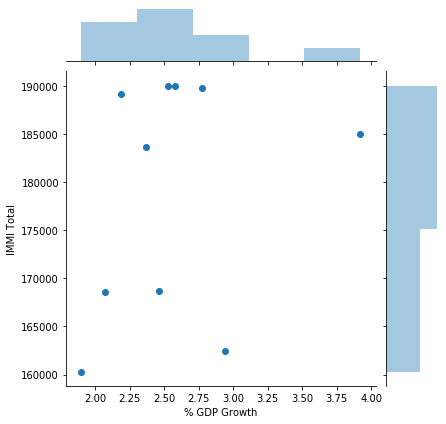

In [16]:
sns.jointplot(x = '% GDP Growth', y = 'IMMI Total', data = masterDF)

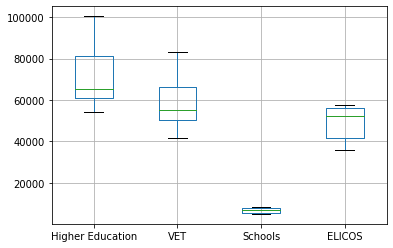

In [20]:
masterDF.boxplot(column = ['Higher Education', 'VET',
       'Schools', 'ELICOS',])

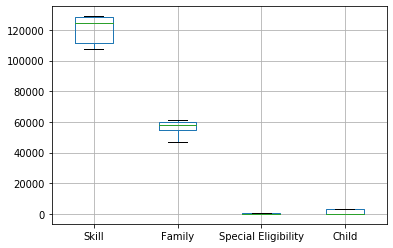

In [21]:
masterDF.boxplot(column = ['Skill', 'Family', 'Special Eligibility', 'Child',])

In [22]:
masterDF[['Skill', 'Family', 'Special Eligibility', 'Child', 'IMMI Total',
       '% IMMI Growth ', '% Skill', '% Family', 'Higher Education', 'VET',
       'Schools', 'ELICOS', 'Total Students', '% Total Students Growth ',
       '% GDP Growth', '% Annual Change', 'Total of Students/IMMI',
       '% Total IMMI Growth ']].corr()

,Skill,Family,Special Eligibility,Child,IMMI Total,% IMMI Growth,% Skill,% Family,Higher Education,VET,Schools,ELICOS,Total Students,% Total Students Growth,% GDP Growth,% Annual Change,Total of Students/IMMI,% Total IMMI Growth
Skill,1.000000,0.649226,-0.368499,-0.206276,0.970525,0.447294,0.167844,-0.170213,-0.459566,-0.570418,-0.493970,-0.047119,-0.406732,0.304690,0.352692,-0.023260,-0.123506,0.570567
Family,0.649226,1.000000,-0.528529,-0.692852,0.800483,0.584104,-0.639406,0.638718,-0.828900,-0.829597,-0.652119,-0.390312,-0.745732,0.054605,0.093830,0.035033,-0.563548,0.336087
Special Eligibility,-0.368499,-0.528529,1.000000,0.241441,-0.454094,-0.167043,0.284833,-0.311607,0.098781,0.132958,0.154700,-0.262328,0.030854,-0.570428,0.642448,0.710068,-0.121648,-0.699524
Child,-0.206276,-0.692852,0.241441,1.000000,-0.308133,-0.579623,0.683532,-0.675582,0.865043,0.833950,0.869512,0.761263,0.875237,0.376288,-0.107150,-0.059122,0.878827,0.143694
IMMI Total,0.970525,0.800483,-0.454094,-0.308133,1.000000,0.496121,-0.058926,0.057242,-0.570666,-0.655635,-0.518176,-0.103313,-0.496701,0.288364,0.285329,-0.010571,-0.214600,0.570372
% IMMI Growth,0.447294,0.584104,-0.167043,-0.579623,0.496121,1.000000,-0.321106,0.305113,-0.690975,-0.662415,-0.770201,-0.684767,-0.719495,-0.404283,0.397344,0.180311,-0.638830,0.138505
% Skill,0.167844,-0.639406,0.284833,0.683532,-0.058926,-0.321106,1.000000,-0.998246,0.626712,0.515139,0.352173,0.487978,0.575340,0.268895,0.210258,-0.080443,0.627158,0.165004
% Family,-0.170213,0.638718,-0.311607,-0.675582,0.057242,0.305113,-0.998246,1.000000,-0.603516,-0.490637,-0.334581,-0.450162,-0.547358,-0.231962,-0.237450,0.075875,-0.596249,-0.135001
Higher Education,-0.459566,-0.828900,0.098781,0.865043,-0.570666,-0.690975,0.626712,-0.603516,1.000000,0.983052,0.873574,0.815698,0.987332,0.410627,-0.369162,-0.257814,0.914567,0.113782
VET,-0.570418,-0.829597,0.132958,0.833950,-0.655635,-0.662415,0.515139,-0.490637,0.983052,1.000000,0.896062,0.766270,0.973587,0.314159,-0.399770,-0.186281,0.869840,0.024404


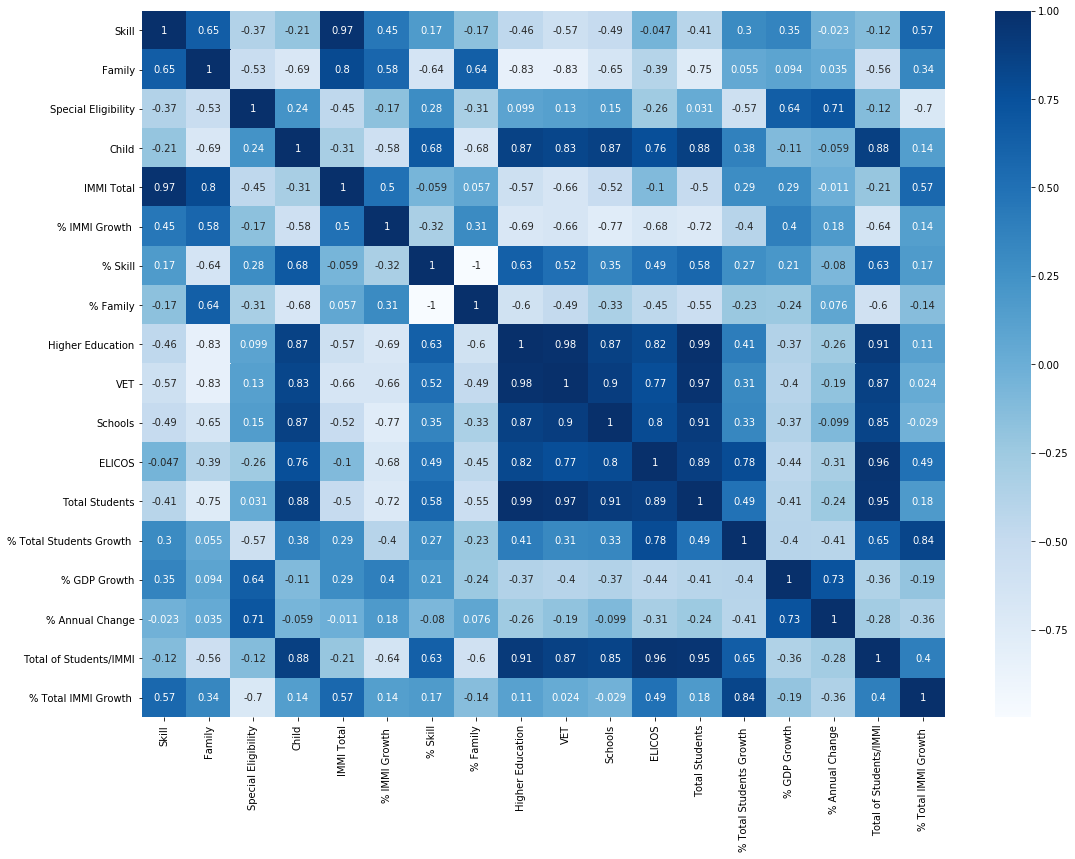

In [33]:
plt.subplots(figsize=(18,13))
sns.heatmap(masterDF[['Skill', 'Family', 'Special Eligibility', 'Child', 'IMMI Total',
       '% IMMI Growth ', '% Skill', '% Family', 'Higher Education', 'VET',
       'Schools', 'ELICOS', 'Total Students', '% Total Students Growth ',
       '% GDP Growth', '% Annual Change', 'Total of Students/IMMI',
       '% Total IMMI Growth ']].corr(), cmap="Blues", annot=True)

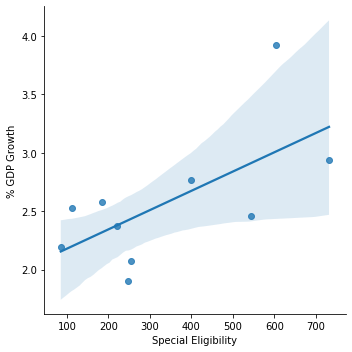

In [31]:
sns.lmplot(y = '% GDP Growth', x = 'Special Eligibility', data = masterDF)

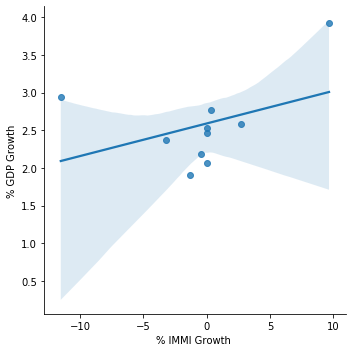

In [32]:
sns.lmplot(y = '% GDP Growth', x = '% IMMI Growth ', data = masterDF)

# ML Model building

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [2]:
masterDF = pd.read_csv("masterDF.csv")

In [5]:
# choosing relevant data

df = masterDF[['Year', 'Skill', 'Special Eligibility', 'IMMI Total',
       '% IMMI Growth ', 'Higher Education', 'VET',
       'ELICOS', 'Total Students', '% Total Students Growth ',
       '% GDP Growth', '% Annual Change', 'Total of Students/IMMI',
       '% Total IMMI Growth ']] 

In [7]:
# normalizing the df

#df=(df-df.mean())/df.std()
#df

In [9]:
# get dummy data

df_dum = pd.get_dummies(df)

In [11]:
# train test split

a = df_dum.drop('Year', axis =1)
X = a
y = a['% GDP Growth'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# multiple linear regression

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

/home/michel/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
/home/michel/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/michel/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1699: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/home/michel/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 26 Aug 2020   Prob (F-statistic):                nan
Time:                        19:14:08   Log-Likelihood:                 274.08
No. Observations:                  10   AIC:                            -528.2
Df Residuals:                       0   BIC:                            -525.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0041        inf         -0        nan         nan         nan
Skill                       -0.0001        inf         -0        nan         nan         nan
Special Eligibility         -0.0002        inf         -0        nan         nan         nan
IMMI Total                6.034e-05        inf          0        nan         nan         nan
% IMMI Growth                0.0448        inf          0        nan         nan         nan
Higher Education             0.0002        inf          0        nan         nan         nan
VET                         -0.0002        inf         -0        nan         nan         nan
ELICOS                    5.122e-05        inf          0        nan         nan         nan
Total Students           -4.745e-05        inf         -0        nan         nan         nan
% Total Students Growth     -0.0191        inf         -0        nan         nan         nan
% GDP Growth                 0.3962        inf          0        nan         nan         nan
% Annual Change              0.4853        inf          0        nan         nan         nan
Total of Students/IMMI    1.289e-05        inf          0        nan         nan         nan
% Total IMMI Growth         -0.0366        inf         -0        nan         nan         nan
==============================================================================
Omnibus:                        2.575   Durbin-Watson:                   0.329
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.521
Skew:                           0.916   Prob(JB):                        0.467
Kurtosis:                       2.459   Cond. No.                     2.58e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
[3] The condition number is large, 2.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=2))

-0.5922296759866221

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02138202685169778, tolerance: 0.00027408875
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00902971968706663, tolerance: 0.00022826833333333335
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006539562477610993, tolerance: 5.676000000000001e-05
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015108251986226328, tolerance: 0.0002739171428571429
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018996739746076504, tolerance: 0.0002681085714285715
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006447343391162196, tolerance: 0.00022826833333333335
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mi

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029685052807633732, tolerance: 0.00022826833333333335
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016508360140998972, tolerance: 5.676000000000001e-05
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00038189604579438977, tolerance: 0.00022586
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want 

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008596089295644339, tolerance: 0.0002739171428571429
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002531185116337806, tolerance: 0.0002681085714285715
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002113977316416841, tolerance: 0.00022826833333333335
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mig

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025239280709386646, tolerance: 0.00022826833333333335
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015264138659048922, tolerance: 5.676000000000001e-05
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007071593533645565, tolerance: 0.00022586
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want t

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000868311263369424, tolerance: 0.00022586
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013370821343724093, tolerance: 0.0002739171428571429
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003950727558759063, tolerance: 0.0002681085714285715
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to i

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015623714574941434, tolerance: 0.0002739171428571429
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004528488348450017, tolerance: 0.0002681085714285715
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0033790775319465457, tolerance: 0.00022826833333333335
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mi

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005065291476647586, tolerance: 0.0002681085714285715
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0037747423202982686, tolerance: 0.00022826833333333335
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002447783643601962, tolerance: 5.676000000000001e-05
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mig

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0055718463775702035, tolerance: 0.0002681085714285715
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004165996005058913, tolerance: 0.00022826833333333335
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0027614931539477966, tolerance: 5.676000000000001e-05
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mi

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004552724567236009, tolerance: 0.00022826833333333335
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030697599508977586, tolerance: 5.676000000000001e-05
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015044674846615338, tolerance: 0.00022586
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005029555283669153, tolerance: 0.00022826833333333335
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034470647989523727, tolerance: 5.676000000000001e-05
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016870880756913432, tolerance: 0.00022586
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001830869332466858, tolerance: 0.00022586
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002608363302852139, tolerance: 0.0002739171428571429
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007142327342027178, tolerance: 0.0002681085714285715
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to in

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007562560490627194, tolerance: 0.0002681085714285715
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005823019733448074, tolerance: 0.00022826833333333335
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004067488444729257, tolerance: 5.676000000000001e-05
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You migh

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021245917693280027, tolerance: 0.00022586
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002951777317353761, tolerance: 0.0002739171428571429
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008008801103410668, tolerance: 0.0002681085714285715
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to i

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004626586167012433, tolerance: 5.676000000000001e-05
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002257258450354361, tolerance: 0.00022586
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003100926393930933, tolerance: 0.0002739171428571429
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to in

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00238643516737198, tolerance: 0.00022586
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0032424543244851324, tolerance: 0.0002739171428571429
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008739667978199, tolerance: 0.0002681085714285715
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to incre

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009077763481158274, tolerance: 0.0002681085714285715
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0072995843090362745, tolerance: 0.00022826833333333335
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005193818394618892, tolerance: 5.676000000000001e-05
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mig

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00764454735701744, tolerance: 0.00022826833333333335
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005451160388204189, tolerance: 5.676000000000001e-05
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026490106855466457, tolerance: 0.00022586
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to i

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005702517481955358, tolerance: 5.676000000000001e-05
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0027670220149593884, tolerance: 0.00022586
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036384290215960473, tolerance: 0.0002739171428571429
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to 

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003751168140243998, tolerance: 0.0002739171428571429
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010032928471752852, tolerance: 0.0002681085714285715
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008360598336832037, tolerance: 0.00022826833333333335
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You migh

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0062161682117726665, tolerance: 5.676000000000001e-05
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030038588713404784, tolerance: 0.00022586
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003870318452507626, tolerance: 0.0002739171428571429
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to 

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003945412210736966, tolerance: 0.0002739171428571429
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01054067603461933, tolerance: 0.0002681085714285715
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008972955628912134, tolerance: 0.00022826833333333335
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009252503018545497, tolerance: 0.00022826833333333335
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006618451831810199, tolerance: 5.676000000000001e-05
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0031832323684267477, tolerance: 0.00022586
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to 

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00681252842085739, tolerance: 5.676000000000001e-05
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003269756799034213, tolerance: 0.00022586
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004118519339511471, tolerance: 0.0002739171428571429
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to inc

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01121032191228991, tolerance: 0.0002681085714285715
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009837814260374039, tolerance: 0.00022826833333333335
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006955233082613645, tolerance: 5.676000000000001e-05
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004281290446879778, tolerance: 0.0002739171428571429
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011460831438753812, tolerance: 0.0002681085714285715
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010180219308301142, tolerance: 0.00022826833333333335
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You migh

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003549098997999103, tolerance: 0.00022586
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004354692424746153, tolerance: 0.0002739171428571429
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011673473126099813, tolerance: 0.0002681085714285715
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to in

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004422925942317435, tolerance: 0.0002739171428571429
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011876973923745395, tolerance: 0.0002681085714285715
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010772208957854005, tolerance: 0.00022826833333333335
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You migh

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003729321803528736, tolerance: 0.00022586
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004493887362507313, tolerance: 0.0002739171428571429
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012095682628043135, tolerance: 0.0002681085714285715
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to in

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008408405105211434, tolerance: 5.676000000000001e-05
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0038185946169971424, tolerance: 0.00022586
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004558622592219982, tolerance: 0.0002739171428571429
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to i

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004617173963276645, tolerance: 0.0002739171428571429
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012480908534878205, tolerance: 0.0002681085714285715
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01168898410820836, tolerance: 0.00022826833333333335
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011959861693208845, tolerance: 0.00022826833333333335
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008903752726153387, tolerance: 5.676000000000001e-05
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003975540090258318, tolerance: 0.00022586
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to i

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004044014692227266, tolerance: 0.00022586
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004787933323044762, tolerance: 0.0002739171428571429
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012832395040706594, tolerance: 0.0002681085714285715
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to in

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012986475168002332, tolerance: 0.0002681085714285715
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01251754960941799, tolerance: 0.00022826833333333335
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009385384936343373, tolerance: 5.676000000000001e-05
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004178495915827585, tolerance: 0.00022586
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004948250146567512, tolerance: 0.0002739171428571429
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01315325325748326, tolerance: 0.0002681085714285715
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to inc

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00985283665099828, tolerance: 5.676000000000001e-05
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004243209921227505, tolerance: 0.00022586
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005029372462349322, tolerance: 0.0002739171428571429
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to inc

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013323578283012578, tolerance: 0.00022826833333333335
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010094851139407201, tolerance: 5.676000000000001e-05
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004303544808209596, tolerance: 0.00022586
  positive)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to i

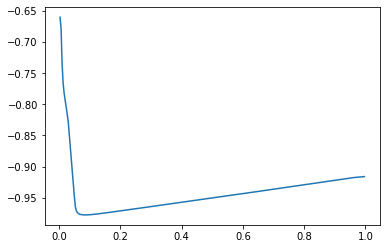

In [14]:
# lasso regression GROWTH

lm_l = Lasso(alpha=.0066)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train))

alpha = []
error = []

for i in range(1,300):
    alpha.append(i/300)
    lml = Lasso(alpha=(i/300))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=5)))
    
plt.plot(alpha,error)

In [15]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
0,0.003333,-0.660642


In [16]:
# random forest


rf = RandomForestRegressor()
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-0.42646111111111185

In [17]:
# tune models GrindsearchCV

parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)
gs.best_score_
gs.best_estimator_

RandomForestRegressor(criterion='mae', max_features='sqrt', n_estimators=80)

In [31]:
# test ensembles

tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)
mean_absolute_error(y_test,tpred_lm)

3.6422494454915832

In [19]:
mean_absolute_error(y_test,tpred_lml)

0.7154564629252034

In [20]:
mean_absolute_error(y_test,tpred_rf)

0.47212499999999946

In [21]:
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

1.879937222745792

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,tpred_lm)

-250.7151460236361